In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 103,2.25,6367.0,3534.0,Built Up area: 3534 (328.32 sq.m.)Carpet area:...,3,5,3+,10.0,South,Undefined,NaN,3534.0,2000.00,0,0,0,0,0,2,0
1,flat,vatika emilia floors,sector 83,0.65,6190.0,1050.0,Super Built up area 1050(97.55 sq.m.)Built Up ...,2,2,2,1.0,South,Relatively New,1050.0,950.0,850.00,0,0,0,0,0,1,174
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up...,3,4,3,14.0,East,Relatively New,1900.0,1305.0,1173.00,1,1,0,0,0,2,167
3,flat,emaar gurgaon greens,sector 102,1.30,7878.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,4.0,East,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,1,125
4,house,signature global city,sector 37d,1.27,8089.0,1570.0,Plot area 1570(145.86 sq.m.),3,3,3,4.0,East,Undefined,NaN,1570.0,NaN,0,0,0,1,0,2,89


In [5]:
df.shape

(3678, 23)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

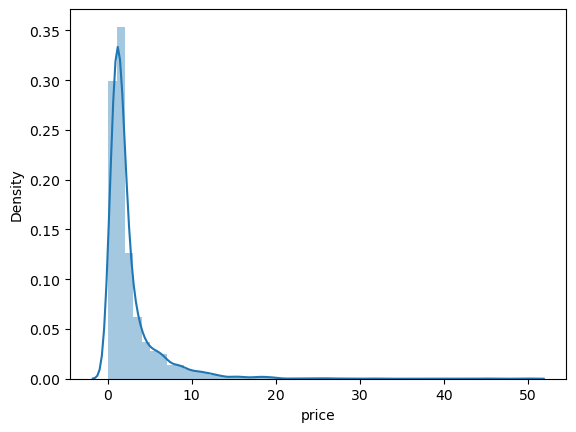

In [7]:
sns.distplot(df['price'])

<Axes: xlabel='price'>

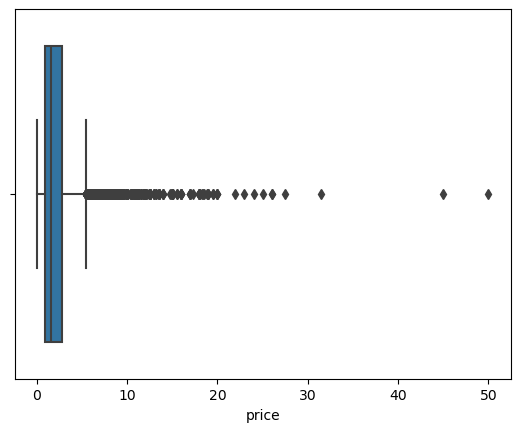

In [8]:
sns.boxplot(x= df['price'])

In [9]:
#calcukate the IQR for the 'price' column

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Identify Outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

#displaying the number of outliers and some statistics
num_outlier = outliers.shape[0]
outlier_price_stats = outliers['price'].describe()

num_outlier, outlier_price_stats


(427,
 count    427.000000
 mean       9.414848
 std        4.829067
 min        5.460000
 25%        6.480000
 50%        8.000000
 75%       10.775000
 max       50.000000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price', ascending= True).head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
382,house,ansal api esencia3.7 â˜…,sector 67,5.46,24170.0,2259.0,Plot area 251(209.87 sq.m.),4,5,3+,2.0,East,Relatively New,NaN,2259.00,NaN,1,0,1,1,0,1,103
2729,flat,experion windchants,sector 112,5.49,11584.0,4739.0,Super Built up area 4739(440.27 sq.m.)Built Up...,4,5,3+,5.0,South,Relatively New,4739.0,3655.35,NaN,0,1,0,0,0,1,168
1164,house,ardee city3.8 â˜…,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),9,9,3+,3.0,South,Moderately Old,NaN,300.00,NaN,0,1,0,1,1,1,26
2599,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3+,2.0,East,Moderately Old,NaN,1800.00,NaN,0,0,1,1,0,2,49
2603,flat,krrish provence estate,gwal pahari,5.50,9482.0,5800.0,Super Built up area 5800(538.84 sq.m.),4,5,3+,11.0,East,New Property,5800.0,NaN,NaN,1,1,0,1,0,2,151


In [11]:
outliers.sort_values('price', ascending= True).tail()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
467,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
3765,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
1804,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,0,74
2668,flat,maa bhagwati residency,sector 7,45.0,5000.0,90000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,2,28
2989,flat,apna enclave,sector 3,50.0,7692.0,65003.0,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,1,37


In [12]:
# on the basis of price column we can say there are some genuine ouliers but there are some data errors as well

# price_per_sqft

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\3749387274.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df['price_per_sqft'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

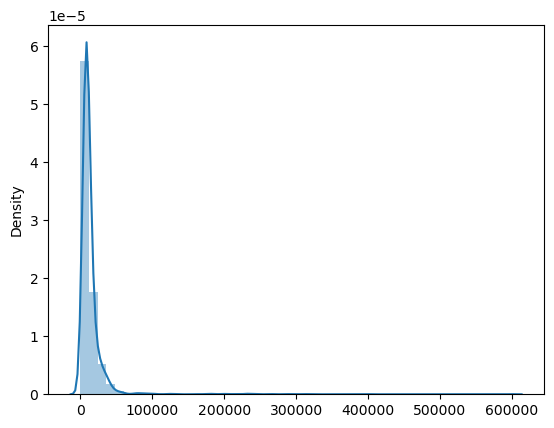

In [13]:
sns.distplot(x= df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

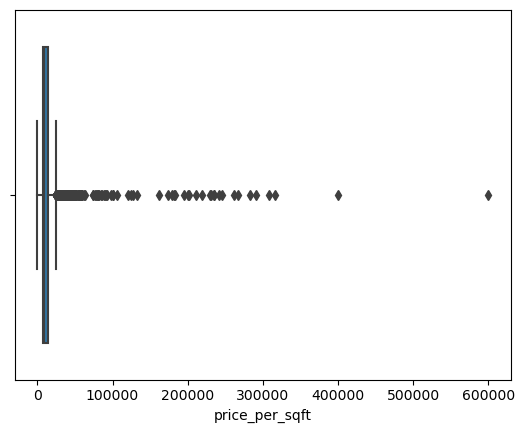

In [14]:
sns.boxplot(x= df['price_per_sqft'])

In [15]:
# calculate the IQR for the price_per_sqft
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the boundries
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

# Identify ouliers
outlier_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outlier_sqft.shape[0]
outliers_stas = outlier_sqft['price_per_sqft'].describe()

num_outliers, outliers_stas

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [16]:
outlier_sqft['area'] = outlier_sqft['area'].apply(lambda x: x*9 if x< 1000 else x)

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\2196217223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sqft['area'] = outlier_sqft['area'].apply(lambda x: x*9 if x< 1000 else x)


In [17]:
outlier_sqft['price_per_sqft'] = round((outlier_sqft['price']*10000000)/outlier_sqft['area'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\58626075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sqft['price_per_sqft'] = round((outlier_sqft['price']*10000000)/outlier_sqft['area'])


In [18]:
outlier_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [19]:
df.update(outlier_sqft)

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\3749387274.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df['price_per_sqft'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

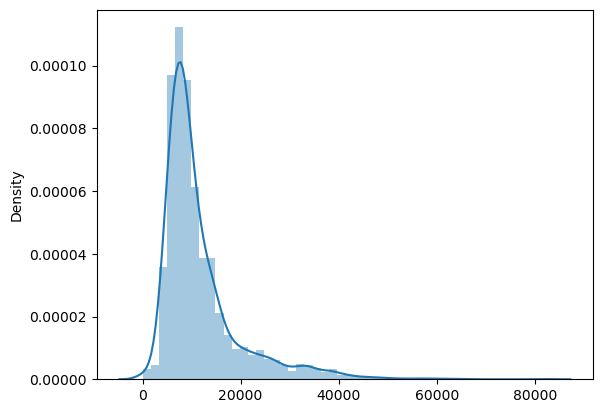

In [20]:
sns.distplot(x= df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

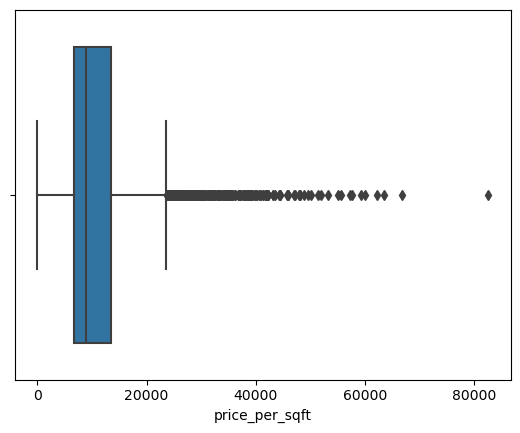

In [21]:
sns.boxplot(x= df['price_per_sqft'])

In [22]:
df[df['price_per_sqft'] > 50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
157,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,2,0
256,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,2,0
307,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
467,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
758,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
1189,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,0,75
1496,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160
1627,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,1,153
1716,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,0,72
2075,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138


In [23]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

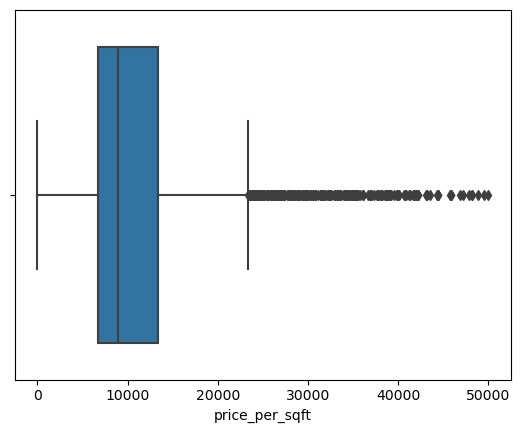

In [24]:
sns.boxplot(x= df['price_per_sqft'])

# Area

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\337550531.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

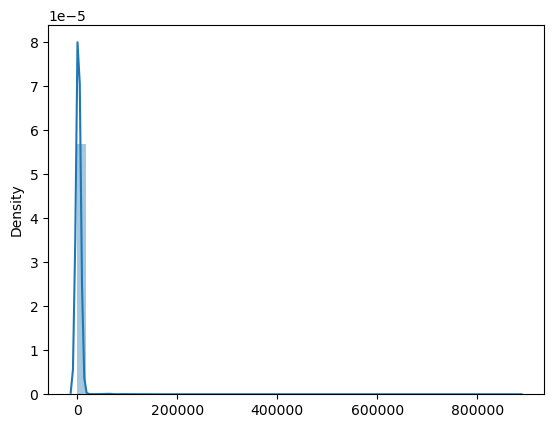

In [25]:
sns.distplot(x = df['area'])

<Axes: xlabel='area'>

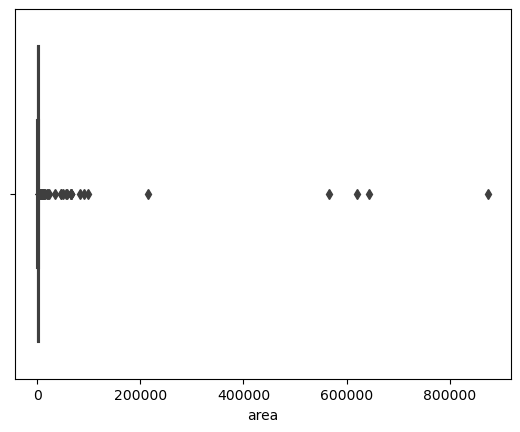

In [26]:
sns.boxplot(x= df['area'])

In [27]:
df['area'].describe()

count      3648.000000
mean       2989.355811
std       23272.359867
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [28]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2329,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,2,44
2494,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,2,65
2696,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0
3593,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,0,44
3598,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,2,76


C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\2229035381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df['area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

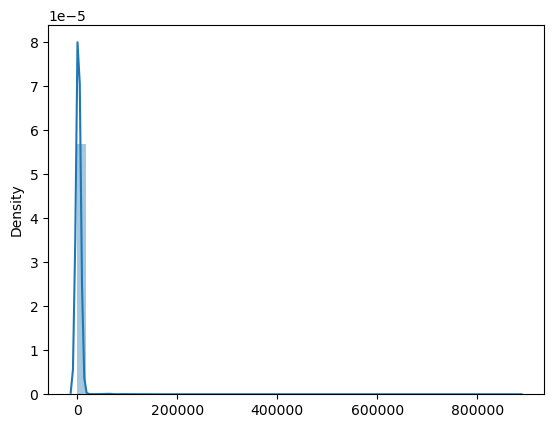

In [29]:
sns.distplot(x= df['area'])

In [30]:
df = df[df['area'] < 100000]

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

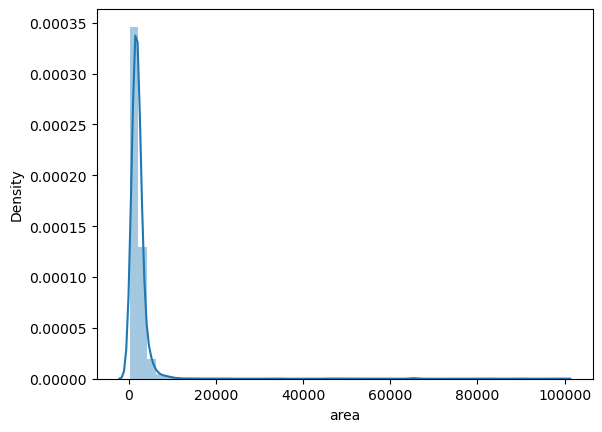

In [31]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

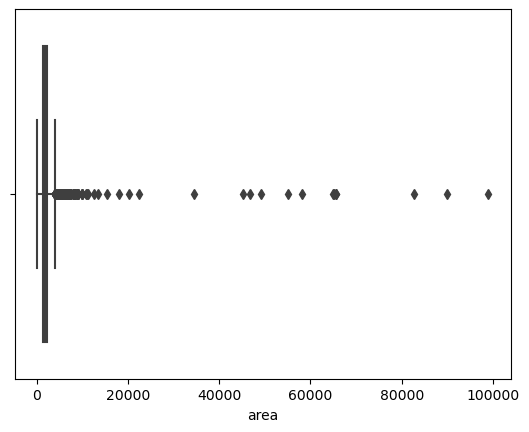

In [32]:
sns.boxplot(x=df['area'])

In [33]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
876,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
2668,flat,maa bhagwati residency,sector 7,45.00,5000.0,90000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,900.00,0,0,0,0,0,2,28
415,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,2,7
103,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,2,51
1225,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,2,15
610,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,2,0
2989,flat,apna enclave,sector 3,50.00,7692.0,65003.0,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,650.00,0,0,0,0,0,1,37
3542,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Undefined,NaN,NaN,58141.00,0,0,0,0,0,2,15
1809,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,2,37
509,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,2,37


In [34]:
# 876, 2668, 103, 1225, 3542, 1809, 1152, 3684, 3220, 1746, 2989, 509

In [35]:
df.drop(index=[876, 2668, 103, 1225, 3542, 1809, 1152, 3684, 3220, 1746, 2989, 509], inplace=True)

In [36]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
415,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,2,7
610,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,2,0
1552,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1135,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
1087,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
187,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,1,0,0,1,1,1,44
1764,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,2,160
2576,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,2,55
3765,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2762,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,2,60


In [37]:
df.loc[415,'area'] = 115*9
df.loc[610,'area'] = 7250
df.loc[1552,'area'] = 5800
df.loc[1135,'area'] = 2660
df.loc[1087,'area'] = 2850
df.loc[187,'area'] = 1812
df.loc[1764,'area'] = 2160
df.loc[2576,'area'] = 1175

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

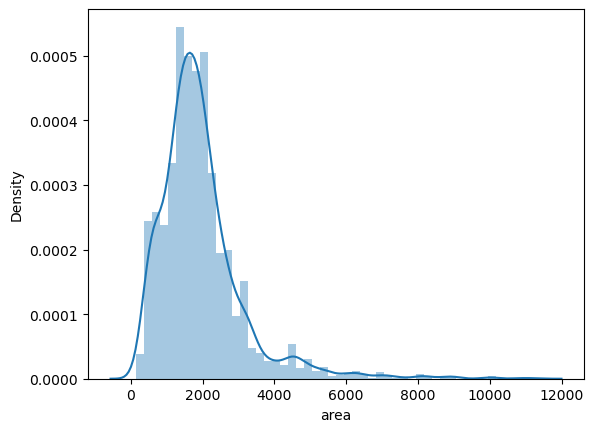

In [38]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

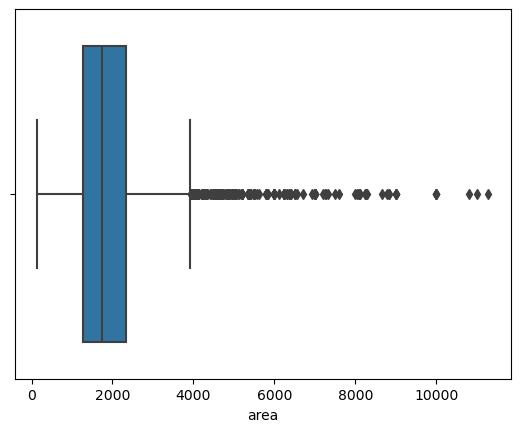

In [39]:
sns.boxplot(x=df['area'])

In [40]:
df['area'].describe()

count     3631.000000
mean      1951.190030
std       1215.585667
min        145.000000
25%       1261.000000
50%       1749.000000
75%       2327.000000
max      11286.000000
Name: area, dtype: float64

# bedroom

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

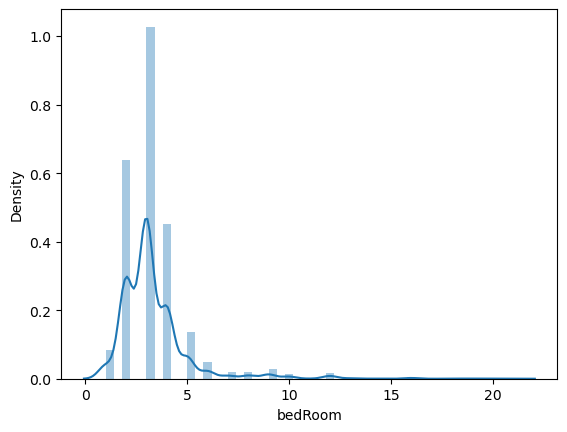

In [42]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

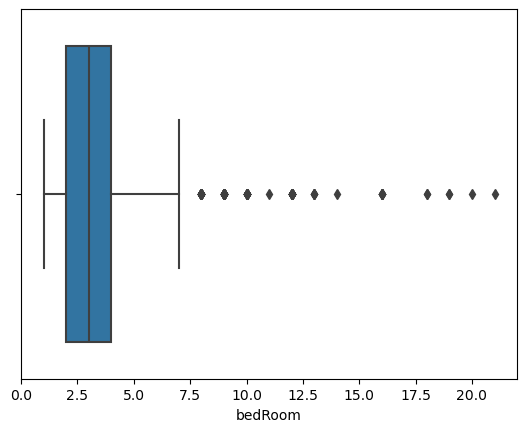

In [43]:
sns.boxplot(x=df['bedRoom'])

In [45]:
df['bedRoom'].describe()

count    3631.000000
mean        3.334343
std         1.830271
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [46]:
df= df[df['bedRoom'] <=10]

In [47]:
df.shape

(3586, 23)

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

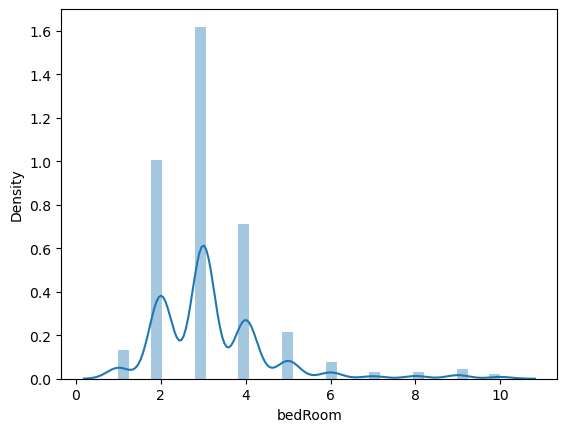

In [49]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

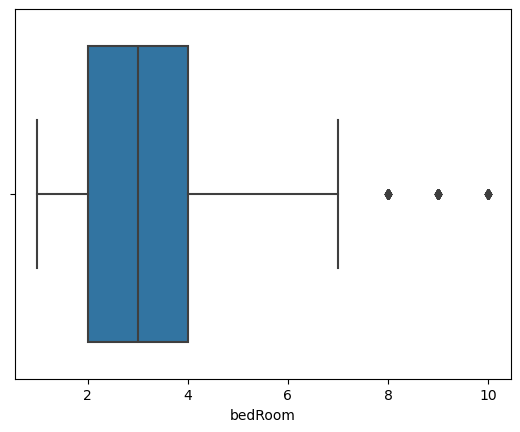

In [50]:
sns.boxplot(x=df['bedRoom'])

# bathroom

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bathroom', ylabel='Density'>

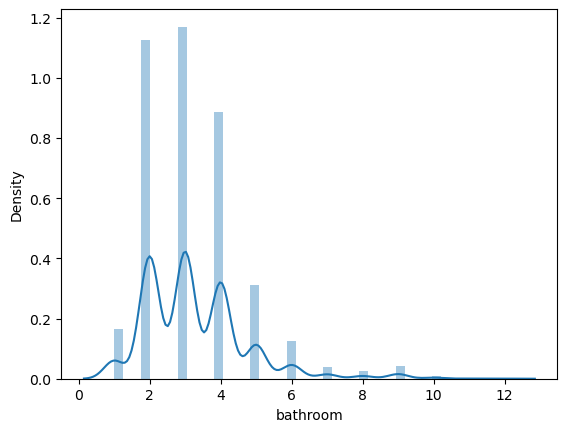

In [51]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

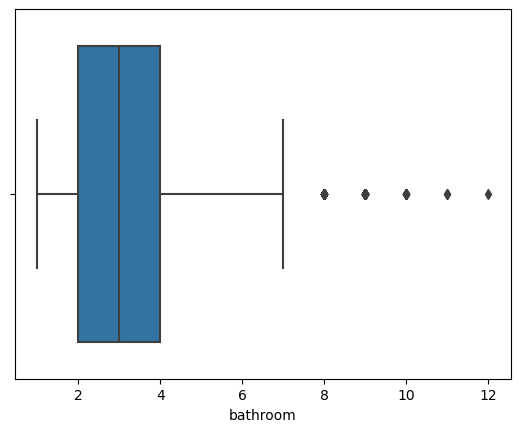

In [52]:
sns.boxplot(x= df['bathroom'])

In [55]:
df[df['bathroom'] > 10].sort_values('bathroom', ascending= True) # --> Nothing Sus to remove

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
18,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39
156,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,0,38
2601,house,adani brahma samsara4.2 â˜…,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146


# Super built up area

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Density'>

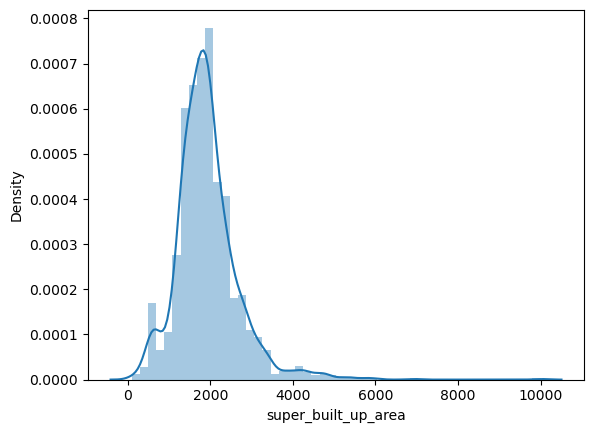

In [56]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

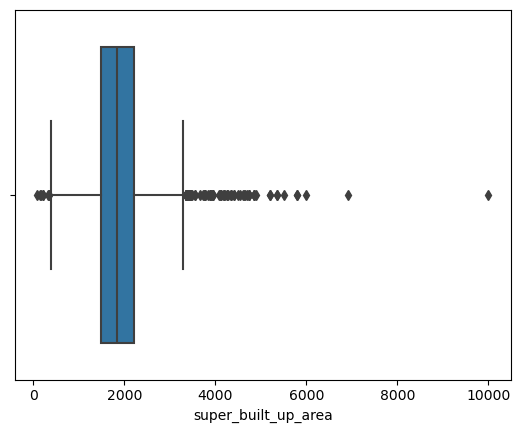

In [57]:
sns.boxplot(x= df['super_built_up_area'])

In [58]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1924.936860
std        764.079429
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [59]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2790,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
2877,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,2,49


# built up area

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Density'>

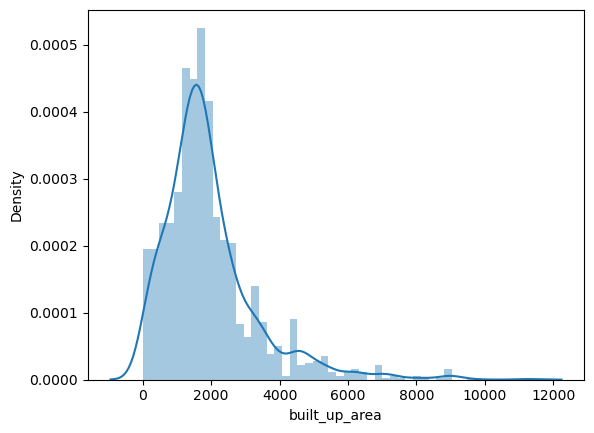

In [60]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

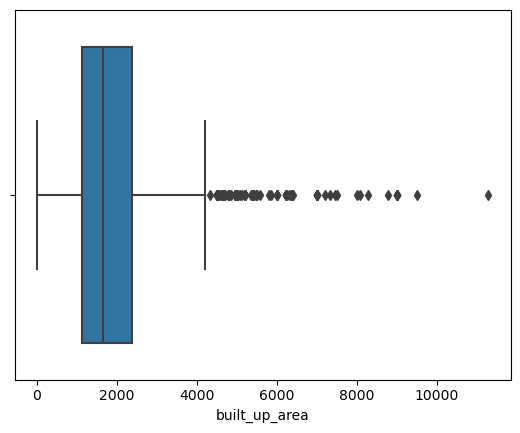

In [61]:
sns.boxplot(x= df['built_up_area'])

In [62]:
df['built_up_area'].describe()

count     1612.000000
mean      1938.859820
std       1398.239887
min         14.000000
25%       1120.000000
50%       1650.000000
75%       2386.250000
max      11286.000000
Name: built_up_area, dtype: float64

In [63]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3765,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


# carpet area

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Density'>

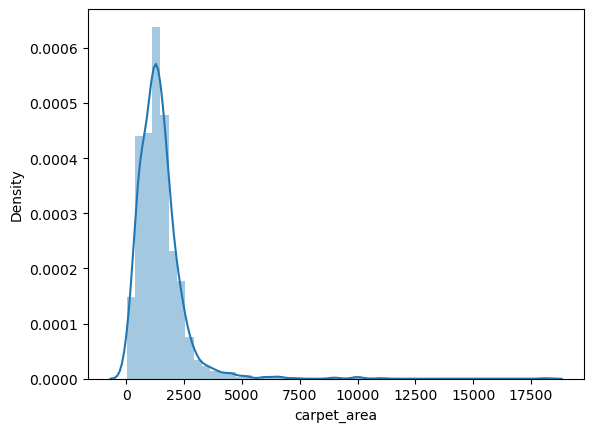

In [64]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

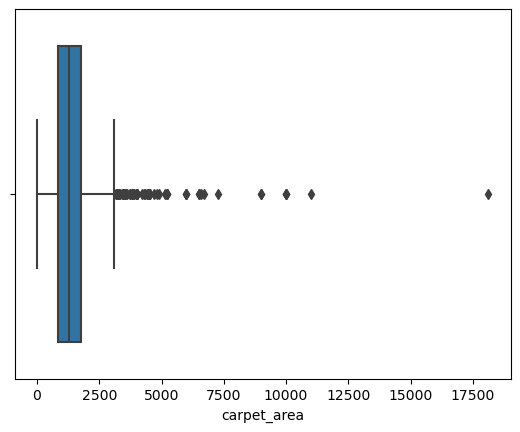

In [65]:
sns.boxplot(x= df['carpet_area'])

In [66]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
187,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1,0,0,1,1,1,44
2762,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,2,60


In [68]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2762,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,2,60


In [69]:
df.shape

(3586, 23)

In [76]:
df['price_per_sqft'] = round(df['price']*10000000/ df['area'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\3644776989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = round(df['price']*10000000/ df['area'])


<Axes: xlabel='price_per_sqft'>

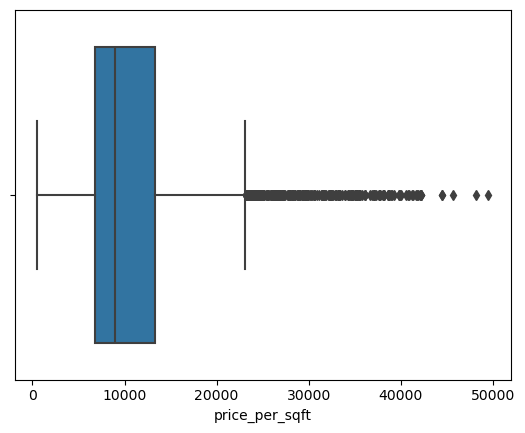

In [77]:
sns.boxplot(x=df['price_per_sqft'])

In [78]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
124,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
263,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
1531,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,0,97
1936,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,2,0
2289,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
2546,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
3007,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
3325,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
3529,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,0,0


In [82]:
x= df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

250.5

In [83]:
df[(df['area']/df['bedRoom'])< 250]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
15,house,uppal southend4.0 â˜…,sector 49,3.75,25562.0,1467.0,Plot area 163(136.29 sq.m.),6,6,3,3.0,East,Moderately Old,NaN,1467.0,NaN,0,0,0,0,1,2,49
65,house,independent,sector 8,0.82,9111.0,900.0,Plot area 100(83.61 sq.m.),4,3,3,2.0,North,Moderately Old,NaN,900.0,NaN,0,0,0,0,0,2,12
70,house,shri shyam residency,sector 104,0.62,12400.0,500.0,Plot area 500(46.45 sq.m.)Built Up area: 900 s...,3,3,1,2.0,NaN,Moderately Old,NaN,900.0,480.0,0,0,0,0,1,0,8
101,house,independent,sector 6,1.25,11574.0,1080.0,Plot area 120(100.34 sq.m.)Built Up area: 120 ...,5,5,1,2.0,South,New Property,NaN,120.0,NaN,0,0,0,1,0,2,0
111,flat,prime habitat,sector 99a,0.27,5433.0,497.0,Carpet area: 497 (46.17 sq.m.),2,2,1,4.0,North-East,New Property,NaN,NaN,497.0,0,0,0,0,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,house,independent,sector 9,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2,2,2,1.0,NaN,Undefined,NaN,NaN,33.0,0,0,0,0,0,2,0
3730,house,uppal southend4.0 â˜…,sector 49,3.75,25562.0,1467.0,Built Up area: 163 (136.29 sq.m.),6,6,3+,3.0,East,Moderately Old,NaN,163.0,NaN,1,0,0,0,0,1,26
3767,house,independent,sector 7,0.90,10000.0,900.0,Plot area 100(83.61 sq.m.),6,4,3,3.0,North-East,Old Property,NaN,900.0,NaN,0,1,0,0,1,1,44
3785,flat,pivotal devaan,sector 84,0.36,7595.0,474.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2,2,1,9.0,West,Relatively New,583.0,NaN,481.0,0,0,1,0,0,0,80


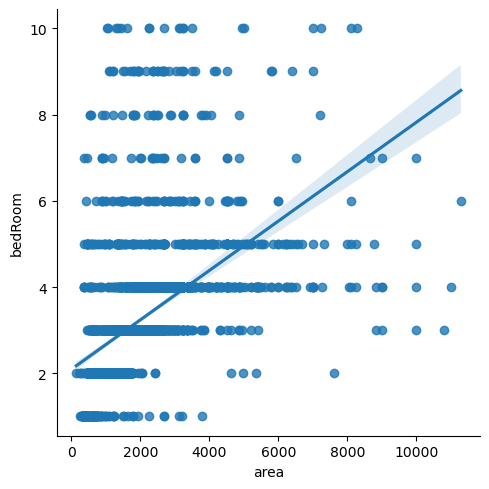

In [84]:
sns.lmplot(data= df, x= 'area', y='bedRoom')

In [85]:
df['area_room_ratio'] = df['area']/df['bedRoom']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\465686754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [87]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

bedRoom
2     47
3     33
5     28
6     17
4     17
9     15
8     12
7      8
10     8
Name: count, dtype: int64

In [88]:
df = df[df['area_room_ratio'] > 100]

In [90]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [91]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [92]:
df.update(outliers_df)

In [93]:
df['area_room_ratio'] = df['area']/df['bedRoom']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1744\465686754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [94]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
301,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,2,0,220.000000
409,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,2,8,200.000000
1241,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,2,0,225.000000
1371,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,2,0,113.000000
1635,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
1977,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,2,0,198.000000
2296,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,2,0,150.000000
2306,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,2,0,120.000000
2721,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,2,0,166.666667
3267,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,2,0,150.000000


In [95]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(13, 24)

In [96]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

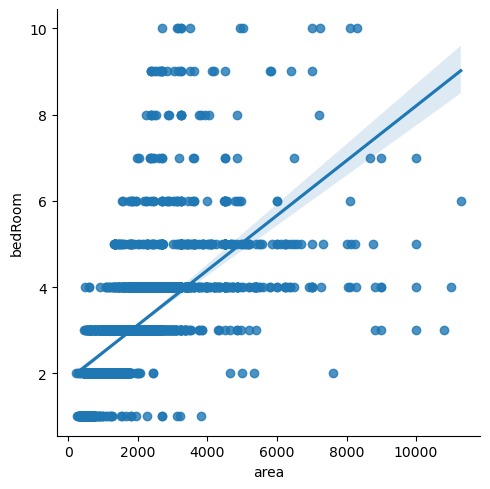

In [97]:
sns.lmplot(data = df, x= 'area', y= 'bedRoom')

In [98]:
df.shape

(3553, 24)

In [99]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 103,2.25,6367.0,3534.0,Built Up area: 3534 (328.32 sq.m.)Carpet area:...,3,5,3+,10.0,South,Undefined,NaN,3534.0,2000.00,0,0,0,0,0,2,0,1178.000000
1,flat,vatika emilia floors,sector 83,0.65,6190.0,1050.0,Super Built up area 1050(97.55 sq.m.)Built Up ...,2,2,2,1.0,South,Relatively New,1050.0,950.0,850.00,0,0,0,0,0,1,174,525.000000
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up...,3,4,3,14.0,East,Relatively New,1900.0,1305.0,1173.00,1,1,0,0,0,2,167,391.000000
3,flat,emaar gurgaon greens,sector 102,1.30,7879.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,4.0,East,Relatively New,1650.0,NaN,1022.58,0,1,0,0,0,1,125,550.000000
4,house,signature global city,sector 37d,1.27,8089.0,1570.0,Plot area 1570(145.86 sq.m.),3,3,3,4.0,East,Undefined,NaN,1570.0,NaN,0,0,0,1,0,2,89,523.333333


In [100]:
df.to_csv('gurgaon_properties_outlier_treated.csv', index = False)